## Imports

In [1]:
!pip install snscrape

In [2]:
import pandas as pd
import snscrape.modules.twitter as sntwitter
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
all = pd.DataFrame(columns = ["Username","Content","Date","Location","FollowersCount"])

In [4]:
acc = pd.read_csv('accounts.csv')

acc1 = acc['username']

for name in acc1:
    # Define the Twitter handle for the account whose tweets you want to retrieve
    handle = name

    # Define the number of tweets you want to retrieve
    num_tweets = 100

    # Define an empty list to hold the tweet dictionaries
    tweets_list = []

    # Loop through the tweets and add their attributes to the list
    for tweet in sntwitter.TwitterSearchScraper(f'from:{handle}').get_items():
        if len(tweets_list) >= num_tweets:
            break
        tweet_dict = {
            "Username": tweet.username,
            "Content": tweet.content,
            "Date": tweet.date,
            "Location": tweet.user.location,
            "FollowersCount": tweet.user.followersCount
        }
        tweets_list.append(tweet_dict)

    # Create a pandas DataFrame from the tweet dictionaries
    df1 = pd.DataFrame(tweets_list)
        
    all = pd.concat([all, df1], ignore_index=True)

# Print the resulting DataFrame
print(all)

Error retrieving https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=from%3Amarkiplier&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&include_ext_edit_control=true&ext=mediaStats%2Chighligh

ScraperException: 4 requests to https://api.twitter.com/2/search/adaptive.json?include_profile_interstitial_type=1&include_blocking=1&include_blocked_by=1&include_followed_by=1&include_want_retweets=1&include_mute_edge=1&include_can_dm=1&include_can_media_tag=1&include_ext_has_nft_avatar=1&include_ext_is_blue_verified=1&include_ext_verified_type=1&skip_status=1&cards_platform=Web-12&include_cards=1&include_ext_alt_text=true&include_ext_limited_action_results=false&include_quote_count=true&include_reply_count=1&tweet_mode=extended&include_ext_collab_control=true&include_ext_views=true&include_entities=true&include_user_entities=true&include_ext_media_color=true&include_ext_media_availability=true&include_ext_sensitive_media_warning=true&include_ext_trusted_friends_metadata=true&send_error_codes=true&simple_quoted_tweet=true&q=from%3Amarkiplier&tweet_search_mode=live&count=20&query_source=spelling_expansion_revert_click&pc=1&spelling_corrections=1&include_ext_edit_control=true&ext=mediaStats%2ChighlightedLabel%2ChasNftAvatar%2CvoiceInfo%2Cenrichments%2CsuperFollowMetadata%2CunmentionInfo%2CeditControl%2Ccollab_control%2Cvibe failed, giving up.

In [5]:
# Export dataframe into a CSV
all.to_csv('user-tweets1.csv', sep=',', index=False)

#it's meant to go to user-tweets not user-tweets1 but I used a new file to not lose progress on the original when snscrape wasn't working

In [6]:
G = nx.Graph()

for name in acc1:
    G.add_node(name)

list(G.nodes)

['markiplier',
 'GameGrumps',
 'egoraptor',
 'jacksepticeye',
 'MatPatGT',
 'MrBeast',
 'Slimecicle',
 'MoistCr1TiKaL',
 'michealreeves',
 'Marisha_Ray',
 'LauraBaileyVO',
 'mathewmercer',
 'VoiceOfOBrien',
 'samriegel',
 'Sniping_Soup',
 'realMax0r',
 'DARUSSIANBADGER',
 'ironmouse',
 'SMii7Y',
 'BikiniBodhi',
 'LudwigAhgren',
 'GiggukAZ',
 'CDawgVA',
 'Sydsnap',
 'jschlatt',
 'anthonypadilla',
 'meatcanyon',
 'DoobusGoobus',
 'JonTronShow',
 'SoGrizzy']

In [7]:
follow = pd.read_csv('followers.csv')

# Loop over each row in the DataFrame
for index, row in follow.iterrows():

    # Get the value from the first column ('username')
    x = row['username']

    # Loop over each column in the row, excluding the first column
    for col in follow.columns[1:]:
        # Get the value of the cell at the current row and column
        value = row[col]

        # Skip if the cell is empty
        if pd.isna(value):
            continue

        # Create a tuple with the first element as x and second element as value
        e = (x, value)

        # Process the non-empty cell
        G.add_edge(*e)

In [8]:
H = nx.MultiGraph(G)  # create an undirected graph H from a directed graph G
list(H.edges())

[('markiplier', 'egoraptor'),
 ('markiplier', 'GameGrumps'),
 ('markiplier', 'LudwigAhgren'),
 ('markiplier', 'jacksepticeye'),
 ('markiplier', 'MrBeast'),
 ('markiplier', 'MatPatGT'),
 ('markiplier', 'MoistCr1TiKaL'),
 ('markiplier', 'michealreeves'),
 ('GameGrumps', 'egoraptor'),
 ('jacksepticeye', 'MrBeast'),
 ('jacksepticeye', 'LudwigAhgren'),
 ('jacksepticeye', 'MatPatGT'),
 ('jacksepticeye', 'Slimecicle'),
 ('jacksepticeye', 'michealreeves'),
 ('jacksepticeye', 'Marisha_Ray'),
 ('jacksepticeye', 'ironmouse'),
 ('jacksepticeye', 'GiggukAZ'),
 ('jacksepticeye', 'CDawgVA'),
 ('jacksepticeye', 'jschlatt'),
 ('jacksepticeye', 'meatcanyon'),
 ('Slimecicle', 'jschlatt'),
 ('Slimecicle', 'realMax0r'),
 ('Slimecicle', 'anthonypadilla'),
 ('Slimecicle', 'meatcanyon'),
 ('MoistCr1TiKaL', 'michealreeves'),
 ('MoistCr1TiKaL', 'LudwigAhgren'),
 ('MoistCr1TiKaL', 'Sniping_Soup'),
 ('MoistCr1TiKaL', 'anthonypadilla'),
 ('MoistCr1TiKaL', 'Marisha_Ray'),
 ('michealreeves', 'anthonypadilla'),
 ('Ma

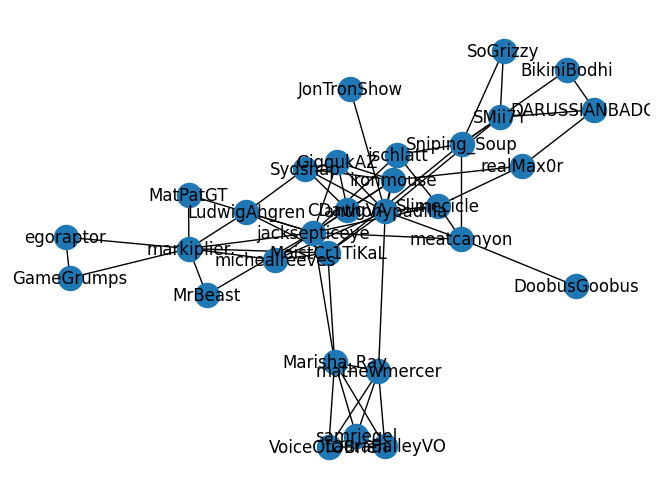

In [9]:
nx.draw(G, with_labels=True)

In [10]:
# Betweenness centrality
bet_cen = nx.betweenness_centrality(G)

# Find the top 2 maximum Betweenness centrality values
max_vals = sorted(set(bet_cen.values()), reverse=True)[:2]

# Find the node(s) with the top 2 maximum Betweenness centrality values
max_nodes = [node for node, centrality in bet_cen.items() if centrality in max_vals]

# Print the result
print(f"The node(s) with the top 2 maximum Betweenness centrality values: {max_nodes}")

#bet_cen

The node(s) with the top 2 maximum Betweenness centrality values: ['jacksepticeye', 'anthonypadilla']


In [11]:
# Closeness centrality
clo_cen = nx.closeness_centrality(G)

# Find the top 2 maximum Closeness centrality values
max_vals = sorted(set(clo_cen.values()), reverse=True)[:2]

# Find the node(s) with the top 2 maximum Closeness centrality values
max_nodes = [node for node, centrality in clo_cen.items() if centrality in max_vals]

# Print the result
print(f"The node(s) with the top 2 maximum Closeness centrality values: {max_nodes}")

#clo_cen

The node(s) with the top 2 maximum Closeness centrality values: ['jacksepticeye', 'anthonypadilla']


In [12]:
# Eigenvector centrality
eig_cen = nx.eigenvector_centrality(G)

# Find the top 2 maximum Eigenvector centrality values
max_vals = sorted(set(eig_cen.values()), reverse=True)[:2]

# Find the node(s) with the top 2 maximum Eigenvector centrality values
max_nodes = [node for node, centrality in eig_cen.items() if centrality in max_vals]

# Print the result
print(f"The node(s) with the top 2 maximum Eigenvector centrality values: {max_nodes}")

#eig_cen

The node(s) with the top 2 maximum Eigenvector centrality values: ['jacksepticeye', 'anthonypadilla']


In [13]:
# Degree centrality
deg_cen = nx.degree_centrality(G)

# Find the top 2 maximum Degree centrality values
max_vals = sorted(set(deg_cen.values()), reverse=True)[:2]

# Find the node(s) with the top 2 maximum Degree centrality values
max_nodes = [node for node, centrality in deg_cen.items() if centrality in max_vals]

# Print the result
print(f"The node(s) with the top 2 maximum Degree centrality values: {max_nodes}")

#deg_cen

The node(s) with the top 2 maximum Degree centrality values: ['jacksepticeye', 'anthonypadilla']


In [2]:
import requests
import pandas as pd

# Set the bearer token value
BEARER_TOKEN = 'AAAAAAAAAAAAAAAAAAAAAPXPlQEAAAAA2PU1l%2Fg3JCGBK%2BWV4dMjydXGKCQ%3D3F3C9RXwzeYivNpAVl1GgSc5jiCDaRutLFVGvIZFq4Sk2O53tG'

# Set the API endpoint URLs for search/recent and user lookup
search_url = 'https://api.twitter.com/2/tweets/search/recent'
user_lookup_url = 'https://api.twitter.com/2/users'

# Set the headers with the bearer token
headers = {
    'Authorization': f'Bearer {BEARER_TOKEN}',
    'Content-Type': 'application/json'
}

# Set the query parameters for the search/recent API call
search_params = {
    'query': '#screenshotsaturday lang:en',  # Hashtag query with language filter
    'tweet.fields': 'public_metrics,author_id',  # Specify additional tweet fields to retrieve
    'max_results': 100  # Specify the number of results to retrieve
}

# Make the search/recent API request
search_response = requests.get(search_url, headers=headers, params=search_params)

# Check the search/recent response status code
if search_response.status_code == 200:
    # API call successful, parse the response JSON
    search_response_json = search_response.json()
    
    # Extract the relevant data from the search/recent response JSON
    tweets = search_response_json['data']
    
    # Create empty lists to store extracted data
    tweet_ids = []
    texts = []
    usernames = []
    retweets = []
    likes = []
    followers = []
    replies = []
    # Loop through the retrieved tweets
    for tweet in tweets:
        tweet_id = tweet['id']
        author_id = tweet['author_id']
        reply_count = tweet['public_metrics']['reply_count']
        retweet_count = tweet['public_metrics']['retweet_count']
        like_count = tweet['public_metrics']['like_count']
        
        # Make user lookup API request to get user's followers count
        user_lookup_params = {
            'ids': author_id,  # User ID to lookup
            'user.fields': 'public_metrics,username',  # Specify additional user fields to retrieve
        }
        user_lookup_response = requests.get(user_lookup_url, headers=headers, params=user_lookup_params)
        
        # Check the user lookup response status code
        if user_lookup_response.status_code == 200:
            # API call successful, parse the response JSON
            user_lookup_response_json = user_lookup_response.json()
            
            # Extract the followers count from the user lookup response JSON
            followers_count = user_lookup_response_json['data'][0]['public_metrics']['followers_count']
            username1 = user_lookup_response_json['data'][0]['username']
            # Append extracted data to the lists
            tweet_ids.append(tweet_id)
            texts.append(tweet['text'])
            usernames.append(username1)
            replies.append(reply_count)
            retweets.append(retweet_count)
            likes.append(like_count)
            followers.append(followers_count)
        else:
            # User lookup API call unsuccessful, print the error message
            print(f'Error {user_lookup_response.status_code}: {user_lookup_response.text}')
else:
    # search/recent API call unsuccessful, print the error message
    print(f'Error {search_response.status_code}: {search_response.text}')

# Create a DataFrame from the extracted data
df = pd.DataFrame({
    'Username': usernames,
    'Retweets': retweets,
    'Likes': likes,
    'Followers': followers,
    'Comments': replies,
    'Text': texts
})

# Write the DataFrame to a CSV file
df.to_csv('twitter3_data.csv', index=False)
print('Data written to twitter_data.csv successfully.')


Data written to twitter_data.csv successfully.


In [3]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

data = pd.read_csv('twitter3_data.csv')
# Create a SentimentIntensityAnalyzer object
sia = SentimentIntensityAnalyzer()

# Define a list of posts from the influencer
posts = data['Text']  # Replace with actual posts

# Initialize lists to store engagement data
likes = data['Likes']
retweets = data['Retweets']
replies = data['Comments']
positivity_scores = []
negativity_scores = []
engagement_scores = []

# Loop through the posts
for i, post in enumerate(posts):
    # Run sentiment analysis on the post text
    sentiment_scores = sia.polarity_scores(post)

    # Extract positive and negative scores
    positivity = sentiment_scores['pos']
    negativity = sentiment_scores['neg']

    # Append sentiment scores to lists
    positivity_scores.append(positivity)
    negativity_scores.append(negativity)

    # Calculate total engagement for the post (sum of likes, retweets, comments)
    engagement = likes[i] + retweets[i] + replies[i]

    engagement_scores.append(engagement)

    # Print post details with sentiment scores and engagement data
    print(f'Post {i + 1}:')
    print('Positivity Score:', positivity)
    print('Negativity Score:', negativity)
    print('Engagement:', engagement)
    print('---')



Post 1:
Positivity Score: 0.0
Negativity Score: 0.093
Engagement: 650
---
Post 2:
Positivity Score: 0.234
Negativity Score: 0.0
Engagement: 20
---
Post 3:
Positivity Score: 0.146
Negativity Score: 0.0
Engagement: 0
---
Post 4:
Positivity Score: 0.0
Negativity Score: 0.084
Engagement: 9
---
Post 5:
Positivity Score: 0.234
Negativity Score: 0.0
Engagement: 20
---
Post 6:
Positivity Score: 0.0
Negativity Score: 0.079
Engagement: 0
---
Post 7:
Positivity Score: 0.138
Negativity Score: 0.0
Engagement: 0
---
Post 8:
Positivity Score: 0.0
Negativity Score: 0.0
Engagement: 13
---
Post 9:
Positivity Score: 0.0
Negativity Score: 0.093
Engagement: 650
---
Post 10:
Positivity Score: 0.0
Negativity Score: 0.093
Engagement: 650
---
Post 11:
Positivity Score: 0.0
Negativity Score: 0.093
Engagement: 650
---
Post 12:
Positivity Score: 0.0
Negativity Score: 0.0
Engagement: 18
---
Post 13:
Positivity Score: 0.0
Negativity Score: 0.0
Engagement: 0
---
Post 14:
Positivity Score: 0.0
Negativity Score: 0.093

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Omar\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [4]:
from scipy.stats import pearsonr

# Calculate Pearson's correlation coefficient and p-value for positivity vs engagement
pos_engagement_corr, pos_engagement_pval = pearsonr(positivity_scores, likes)
print('Correlation between Positivity and Engagement:')
print('Pearson\'s correlation coefficient:', pos_engagement_corr)
print('p-value:', pos_engagement_pval)

# Calculate Pearson's correlation coefficient and p-value for negativity vs engagement
neg_engagement_corr, neg_engagement_pval = pearsonr(negativity_scores, likes)
print('Correlation between Negativity and Engagement:')
print('Pearson\'s correlation coefficient:', neg_engagement_corr)
print('p-value:', neg_engagement_pval)

Correlation between Positivity and Engagement:
Pearson's correlation coefficient: 0.16046636313330176
p-value: 0.11074748410651057
Correlation between Negativity and Engagement:
Pearson's correlation coefficient: -0.08270328584222343
p-value: 0.4133356647899616


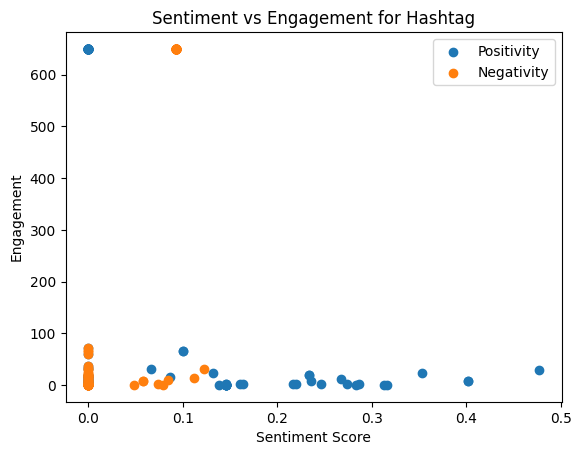

In [5]:
import matplotlib.pyplot as plt

# Define the positivity and negativity scores and engagement data (likes, retweets, comments)
positivity_scores = positivity_scores 
negativity_scores = negativity_scores  
engagement_data = engagement_scores  

# Create a scatter plot
plt.scatter(positivity_scores, engagement_data, label='Positivity')
plt.scatter(negativity_scores, engagement_data, label='Negativity')
plt.xlabel('Sentiment Score')
plt.ylabel('Engagement')
plt.title('Sentiment vs Engagement for Hashtag')
plt.legend()
plt.show()